## Load dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# load dataset
df = pd.read_csv('drug_dataset.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Inspect dataset

In [2]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

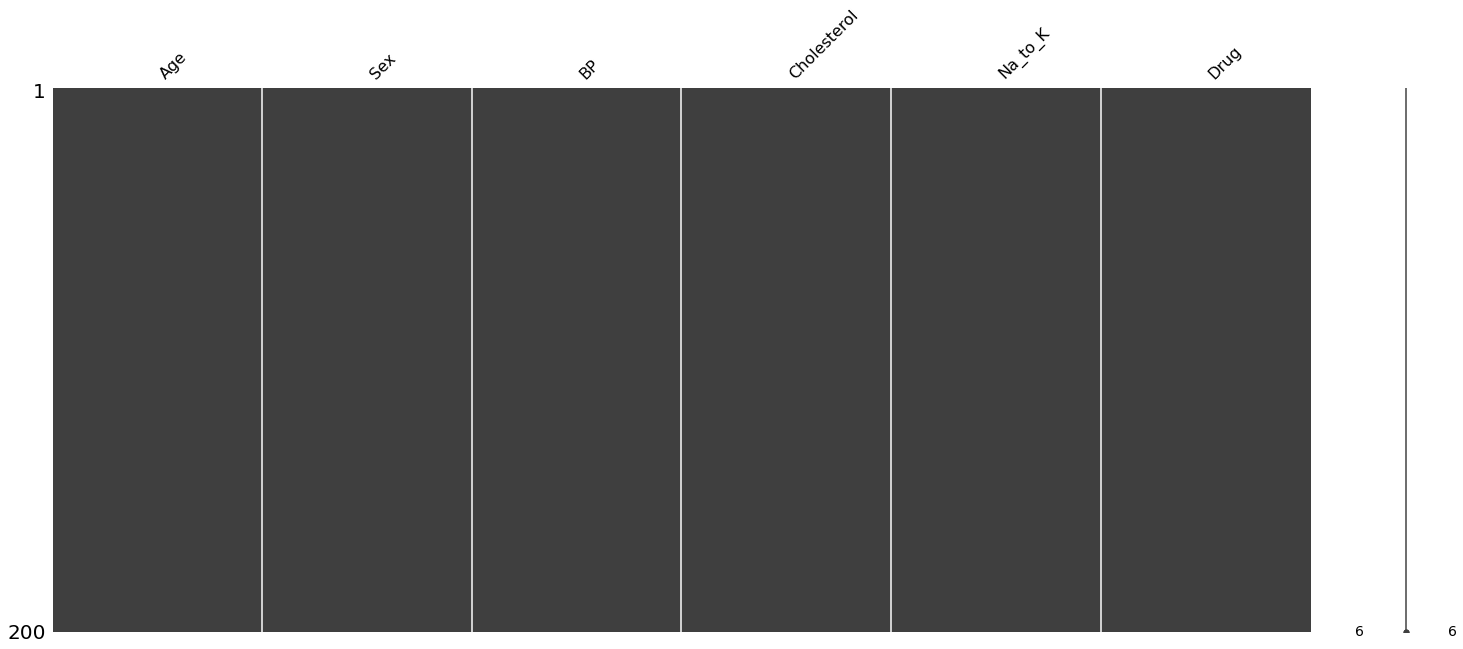

In [3]:
import missingno as msno

# check for NaN values
msno.matrix(df)

df.isna().sum()

In [4]:
# Check columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# Check labels
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot: >

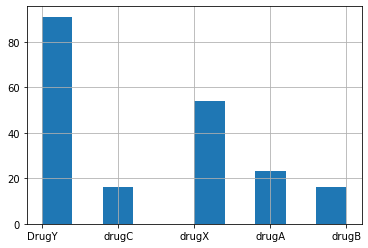

In [6]:
df['Drug'].hist()

## Data maipulation

In [7]:
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])

df = encoder.fit_transform(df)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,DrugY
1,47,2,2,1,13.093,drugC
2,47,2,2,1,10.114,drugC
3,28,1,3,1,7.798,drugX
4,61,1,2,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,2,2,1,12.006,drugC
197,52,2,3,1,9.894,drugX
198,23,2,3,2,14.020,drugX


In [8]:
# get features
X = df.drop(['Drug'], axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,1,1,25.355
1,47,2,2,1,13.093
2,47,2,2,1,10.114
3,28,1,3,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,2,2,1,12.006
197,52,2,3,1,9.894
198,23,2,3,2,14.020


In [9]:
# get labels
y = df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

# Not normalized

In [10]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 5) (60, 5) (140,) (60,)


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [12]:
from sklearn.metrics import classification_report

# make prediction
y_pred_clf_gini = clf_gini.predict(X_test)
print(f'Train accuracy:\t {clf_gini.score(X_train, y_train)}')
print(f'Test accuracy:\t {clf_gini.score(X_test, y_test)}')

print(classification_report(y_test, y_pred_clf_gini))

Train accuracy:	 1.0
Test accuracy:	 0.9833333333333333
              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



## KNeighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# make prediction
y_pred_neigh = neigh.predict(X_test)
print(f'Train accuracy:\t {neigh.score(X_train, y_train)}')
print(f'Test accuracy:\t {neigh.score(X_test, y_test)}')

print(classification_report(y_test, y_pred_neigh))

Train accuracy:	 0.7785714285714286
Test accuracy:	 0.6166666666666667
              precision    recall  f1-score   support

       DrugY       0.83      0.93      0.88        27
       drugA       0.33      0.43      0.38         7
       drugB       0.33      0.20      0.25         5
       drugC       0.00      0.00      0.00         5
       drugX       0.50      0.50      0.50        16

    accuracy                           0.62        60
   macro avg       0.40      0.41      0.40        60
weighted avg       0.57      0.62      0.59        60



## MLP

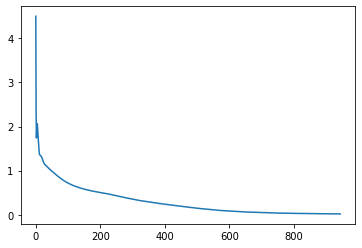

In [15]:
from sklearn.neural_network import MLPClassifier

# build MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model = clf.fit(X_train, y_train)
plt.plot(clf.loss_curve_)

In [16]:
# make prediction
y_pred_mlp = model.predict(X_test)
print(f'Train accuracy:\t {model.score(X_train, y_train)}')
print(f'Test accuracy:\t {model.score(X_test, y_test)}')

print(classification_report(y_test, y_pred_mlp))

Train accuracy:	 1.0
Test accuracy:	 0.85
              precision    recall  f1-score   support

       DrugY       0.86      0.93      0.89        27
       drugA       0.83      0.71      0.77         7
       drugB       0.75      0.60      0.67         5
       drugC       0.67      0.40      0.50         5
       drugX       0.89      1.00      0.94        16

    accuracy                           0.85        60
   macro avg       0.80      0.73      0.75        60
weighted avg       0.84      0.85      0.84        60



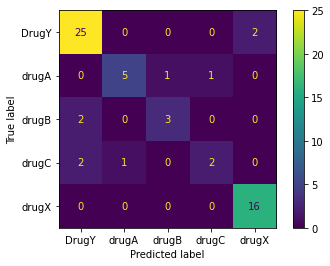

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# plot_confusion_matrix(model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_mlp)



## PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape, y.shape

((200, 3), (200,))

In [19]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.8376527 , 0.15882149, 0.002037  ]), 0.9985111868497314)

In [20]:
# split X and y into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(140, 3) (60, 3) (140,) (60,)


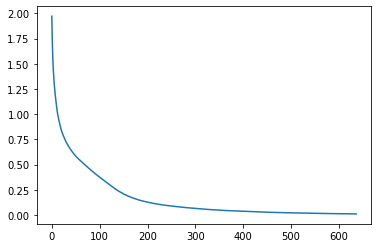

In [22]:
# build MLP classifier
clf_pca = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_pca = clf_pca.fit(X_train_pca, y_train_pca)
plt.plot(clf_pca.loss_curve_)

In [23]:
# make prediction
y_pred_pca_mlp = model_pca.predict(X_test_pca)
print(f'Train accuracy:\t {model_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {model_pca.score(X_test_pca, y_test_pca)}')

print(classification_report(y_test_pca, y_pred_pca_mlp))

Train accuracy:	 1.0
Test accuracy:	 0.9
              precision    recall  f1-score   support

       DrugY       0.93      1.00      0.96        27
       drugA       1.00      1.00      1.00         7
       drugB       0.83      1.00      0.91         5
       drugC       0.67      0.40      0.50         5
       drugX       0.87      0.81      0.84        16

    accuracy                           0.90        60
   macro avg       0.86      0.84      0.84        60
weighted avg       0.89      0.90      0.89        60



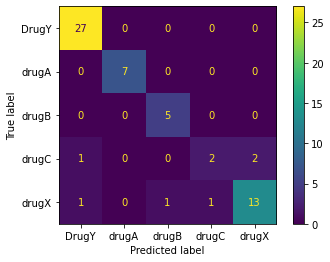

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

# plot_confusion_matrix(model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_pca_mlp)

## LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

(200, 3)

In [26]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(140, 3) (60, 3) (140,) (60,)


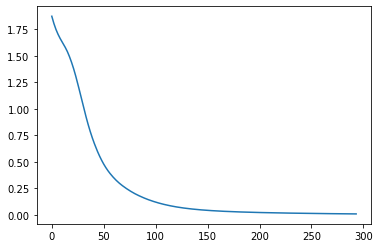

In [28]:
# build MLP classifier
clf_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda = clf_lda.fit(X_train_lda, y_train_lda)
plt.plot(clf_lda.loss_curve_)

In [29]:
# make prediction
y_pred_lda_mlp = model_lda.predict(X_test_lda)
print(f'Train accuracy:\t {model_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {model_lda.score(X_test_lda, y_test_lda)}')

print(classification_report(y_test_lda, y_pred_lda_mlp))

Train accuracy:	 1.0
Test accuracy:	 0.9666666666666667
              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      0.86      0.92         7
       drugB       0.83      1.00      0.91         5
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        16

    accuracy                           0.97        60
   macro avg       0.96      0.93      0.94        60
weighted avg       0.97      0.97      0.97        60



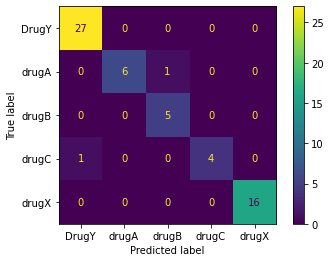

In [30]:
# plot_confusion_matrix(model_lda, X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_lda_mlp)
